# **TOPIC**

 PERFORMANCE ANALYSIS AND COMPARISION OF CLASSIFICATION ALGORITHMS


1.   logistic Regression
2.   K-Neart Neighbors
3.   Support Vector Machine
4.   Decision Tree Algorithm.



# **CLASSIFICATION**
Classification is a supervised machine learning method where the model tries to predict the correct label of a given input data. In classification, the model is fully trained using the training data, and then it is evaluated on test data before being used to perform prediction on new unseen data.

**STEP ! : LOAD THE DATA**

**DATASET: **
Obesity is a great challenge for health worldwide, which cause various health disease and reduce life quality. With the help of this data set we aims to estimate the obesity level in individuals based on their physical activities, eating habits, family history on overweight, etc. We will use various methods on the dataset gathered from public online survey to prevent and reduce the obesity level.

[Obesity dataset - source : Kagale](https://www.kaggle.com/datasets/lesumitkumarroy/obesity-data-set)


***importing dependencies***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
sns.set_style("darkgrid")

***loading the dataset***

In [2]:
data = pd.read_csv('/kaggle/input/obesity-data-set/ObesityDataSet_raw_and_data_sinthetic.csv')

***The dataset***
Gender: Feature, Categorical, "Gender"

Age : Feature, Continuous, "Age"

Height: Feature, Continuous

Weight: Feature Continuous

family_history_with_overweight: Feature, Binary, " Has a family member suffered or suffers from overweight? "

FAVC : Feature, Binary, " Do you eat high caloric food frequently? "

FCVC : Feature, Integer, " Do you usually eat vegetables in your meals? "

NCP : Feature, Continuous, " How many main meals do you have daily? "

CAEC : Feature, Categorical, " Do you eat any food between meals? "

SMOKE : Feature, Binary, " Do you smoke? "

CH2O: Feature, Continuous, " How much water do you drink daily? "

SCC: Feature, Binary, " Do you monitor the calories you eat daily? "

FAF: Feature, Continuous, " How often do you have physical activity? "

TUE : Feature, Integer, " How much time do you use technological devices such as cell phone, videogames, television, computer and others? "

CALC : Feature, Categorical, " How often do you drink alcohol? "

MTRANS : Feature, Categorical, " Which transportation do you usually use? "

NObeyesdad : Target, Categorical, "Obesity level"


In [3]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

***Data PreProcessing***

In [5]:
data.shape

(2111, 17)

In [6]:
data.duplicated().sum()

24

In [7]:
data.loc[data.duplicated(keep=False), :]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
97,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
105,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
145,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
208,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight


In [8]:
data = data.rename(columns={"CALC":"alcohol_drinking_frequency",
            "FAVC":"high_calorie_food_eat",
            "FCVC":"vegetable_eat_daily",
            "NCP":"number_of_meals_daily",
            "SCC":"calories_monitoring",
            "CH2O":"water_drinking_daily",
            "FAF":"physical_activity_daily",
            "TUE":"electronics_usage_daily",
            "CAEC":"food_between_meals",
            "MTRANS":"method_of_transportion"})

In [9]:
for col in ['Age', 'Weight', 'vegetable_eat_daily','number_of_meals_daily', 'water_drinking_daily','physical_activity_daily','electronics_usage_daily']:
    data[col] = data.loc[:,col].round().astype(int)

In [10]:
data.describe()

,Age,Height,Weight,vegetable_eat_daily,number_of_meals_daily,water_drinking_daily,physical_activity_daily,electronics_usage_daily
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701677,86.586452,2.423496,2.687826,2.014685,1.006632,0.664614
std,6.357078,0.093305,26.190136,0.583905,0.809680,0.688616,0.895462,0.674009
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.500000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,23.000000,1.700499,83.000000,2.000000,3.000000,2.000000,1.000000,1.000000
75%,26.000000,1.768464,107.000000,3.000000,3.000000,2.000000,2.000000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


***Univariate analysis visualization***

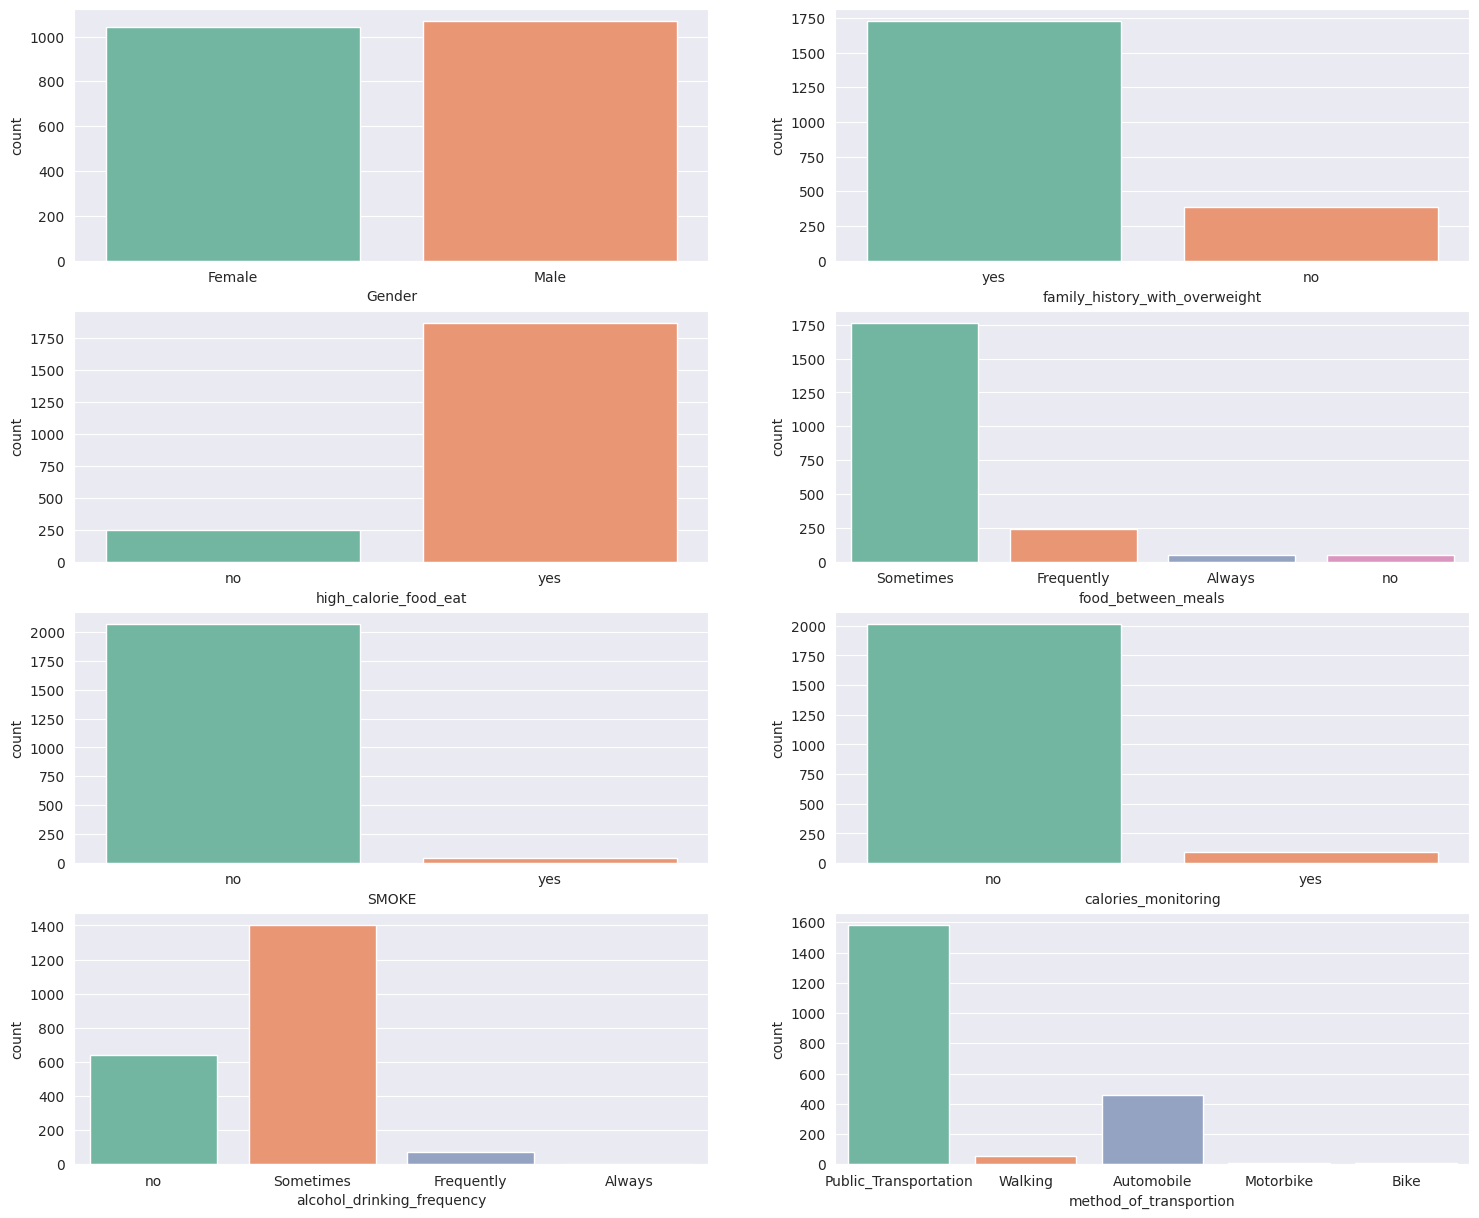

In [11]:
plt.figure(figsize=(18,15))
for i,col in enumerate(data.select_dtypes(include="object").columns[:-1]):
    plt.subplot(4,2,i+1)
    sns.countplot(data=data,x=col,palette=sns.color_palette("Set2"))

<Axes: xlabel='NObeyesdad'>

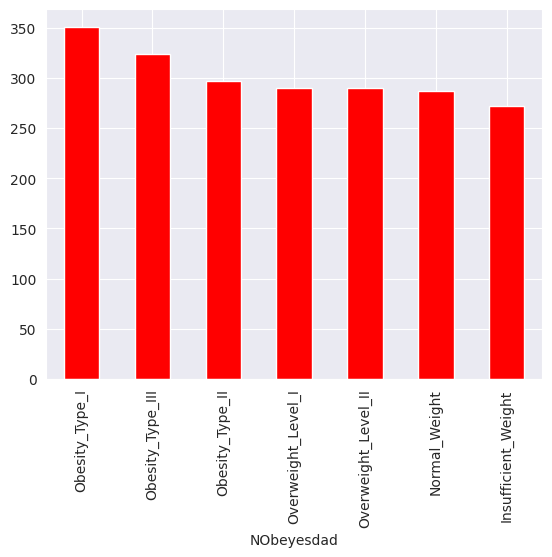

In [12]:
data["NObeyesdad"].value_counts().sort_values(ascending=False).plot(kind="bar",color="red")

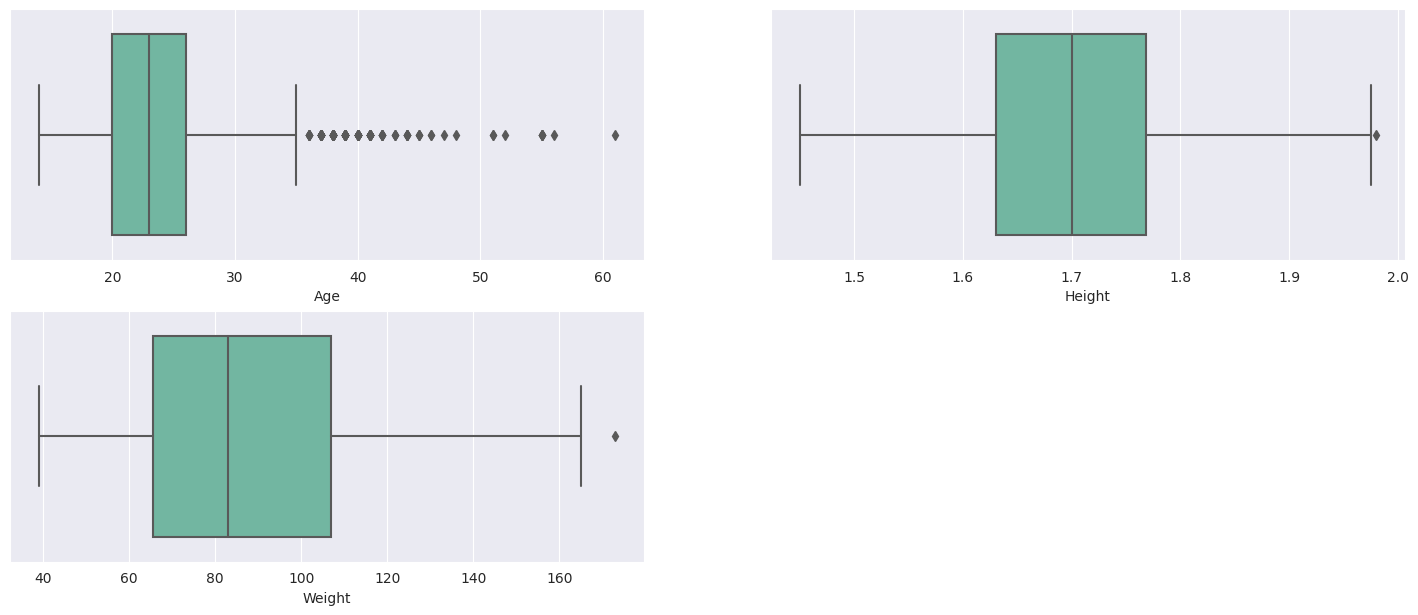

In [13]:
plt.figure(figsize=(18,15))
for i,col in enumerate(data.select_dtypes(include="number").columns[:3]):
    plt.subplot(4,2,i+1)
    sns.boxplot(data=data,x=col,palette=sns.color_palette("Set2"))

***removing outliers***

In [14]:
data=data[np.abs(stats.zscore(data["Age"])) < 2].reset_index(drop=True)

<Axes: xlabel='Age'>

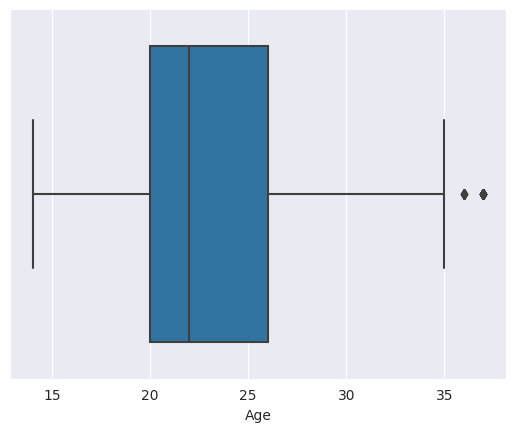

In [15]:
sns.boxplot(data=data,x="Age")

In [16]:
data.shape

(1981, 17)

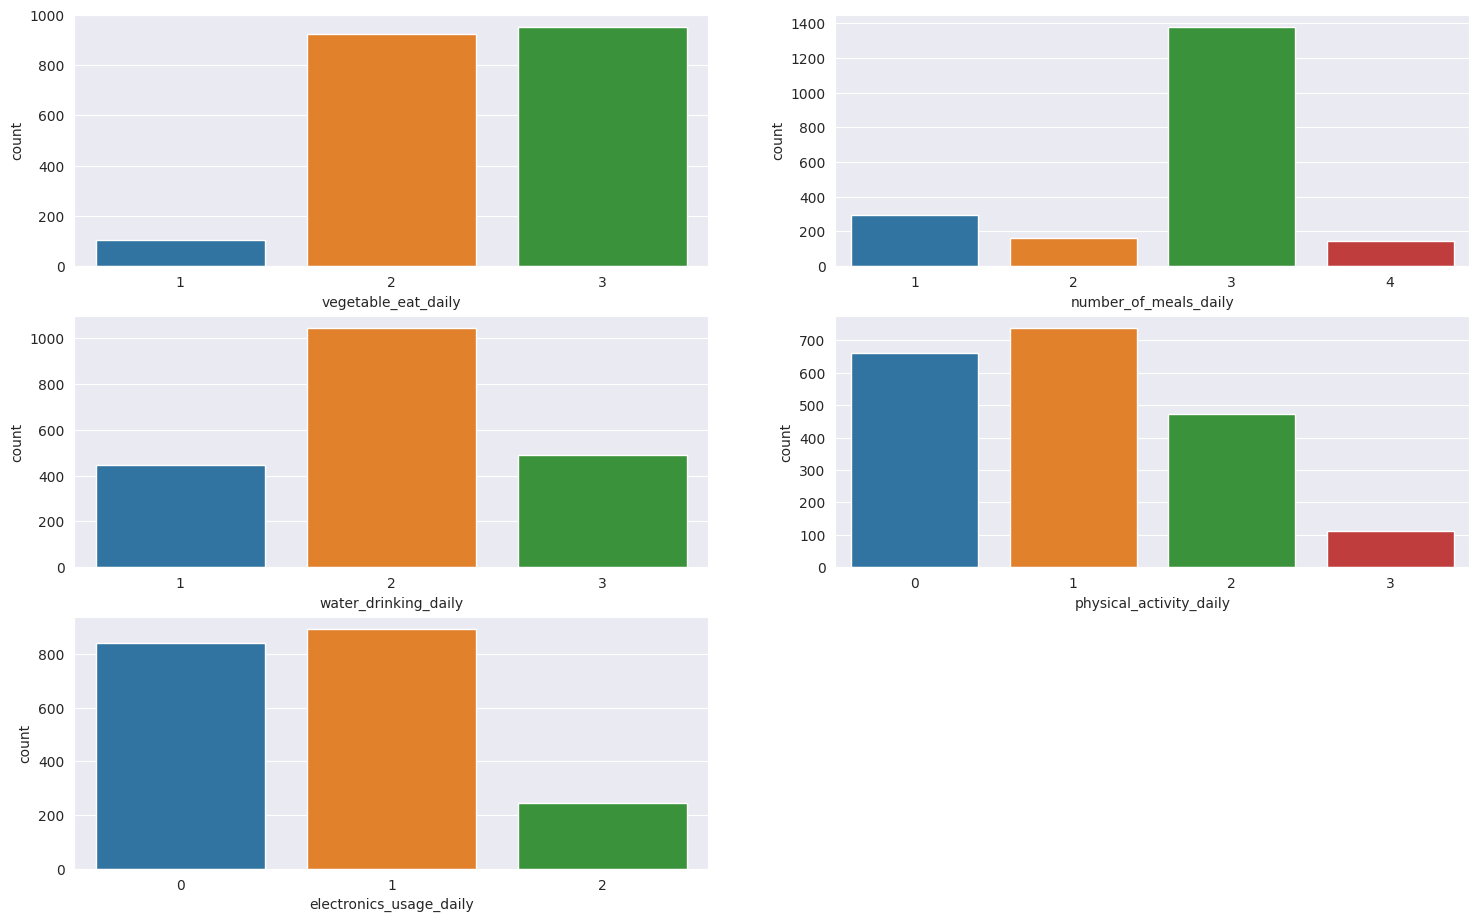

In [17]:
plt.figure(figsize=(18,15))
for i,col in enumerate(data.select_dtypes(include="number").columns[3:]):
    plt.subplot(4,2,i+1)
    sns.countplot(data=data,x=col)

***Multivariate Analysis Visualization***

In [18]:
data.groupby(['NObeyesdad', 'high_calorie_food_eat'])["high_calorie_food_eat"].count()

NObeyesdad           high_calorie_food_eat
Insufficient_Weight  no                        51
                     yes                      220
Normal_Weight        no                        75
                     yes                      206
Obesity_Type_I       no                         9
                     yes                      284
Obesity_Type_II      no                         6
                     yes                      268
Obesity_Type_III     no                         1
                     yes                      323
Overweight_Level_I   no                        20
                     yes                      256
Overweight_Level_II  no                        71
                     yes                      191
Name: high_calorie_food_eat, dtype: int64

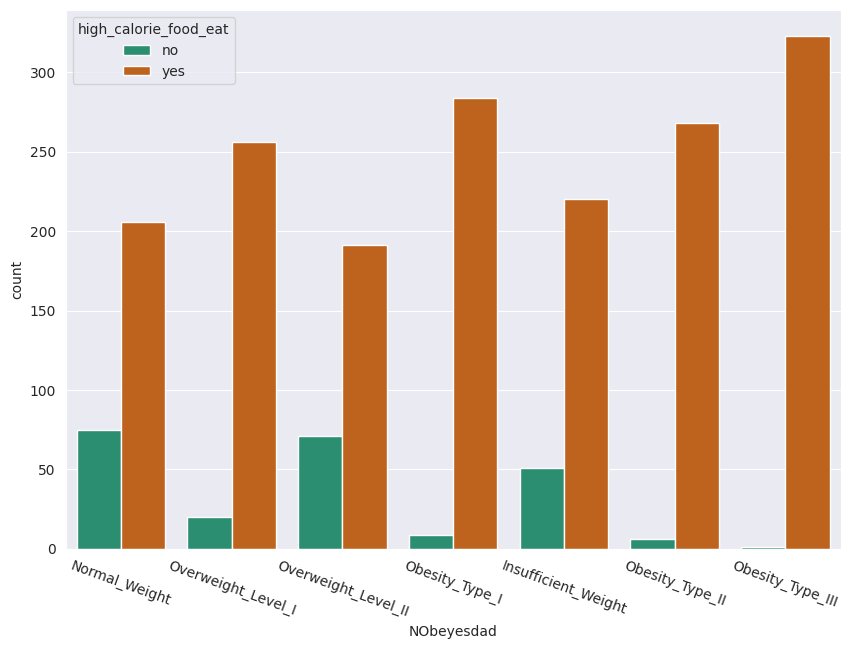

In [19]:
plt.figure(figsize=(10,7))
sns.countplot(data=data,x=data.NObeyesdad,hue=data.high_calorie_food_eat,palette=sns.color_palette("Dark2"))
plt.xticks(rotation=-20)
plt.show()

In [20]:
data.groupby("NObeyesdad")["Age"].median()

NObeyesdad
Insufficient_Weight    19.0
Normal_Weight          21.0
Obesity_Type_I         23.0
Obesity_Type_II        27.0
Obesity_Type_III       25.0
Overweight_Level_I     21.0
Overweight_Level_II    23.0
Name: Age, dtype: float64

Text(0.5, 1.0, 'Average age of each obesity type')

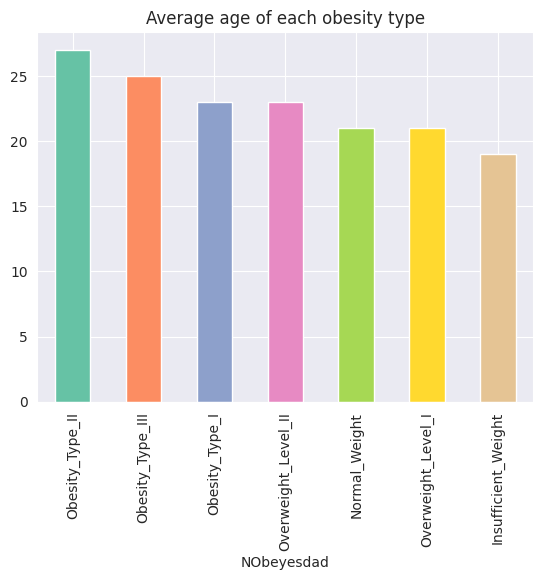

In [21]:
data.groupby("NObeyesdad")["Age"].median().sort_values(ascending=False).plot(kind="bar",color = sns.color_palette("Set2"))
plt.title("Average age of each obesity type")

In [22]:
data.groupby("NObeyesdad")["Weight"].mean()

NObeyesdad
Insufficient_Weight     49.926199
Normal_Weight           62.106762
Obesity_Type_I          94.819113
Obesity_Type_II        115.306569
Obesity_Type_III       120.972222
Overweight_Level_I      74.510870
Overweight_Level_II     82.045802
Name: Weight, dtype: float64

<Axes: xlabel='NObeyesdad'>

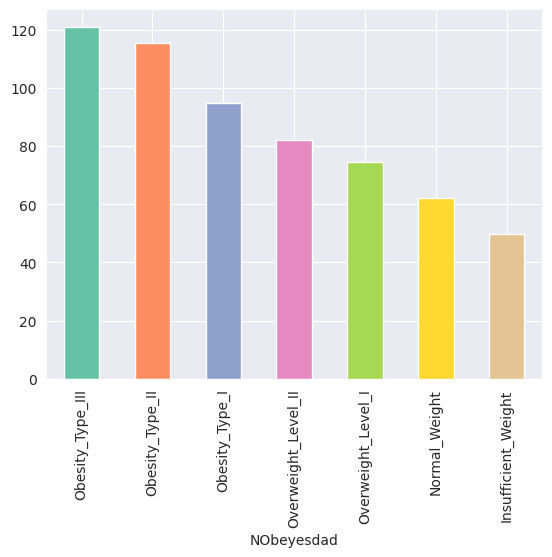

In [23]:
data.groupby("NObeyesdad")["Weight"].mean().sort_values(ascending=False).plot(kind="bar",color=sns.color_palette("Set2"))

***AFFECT OF GENDER ON OBESITY TYPE***

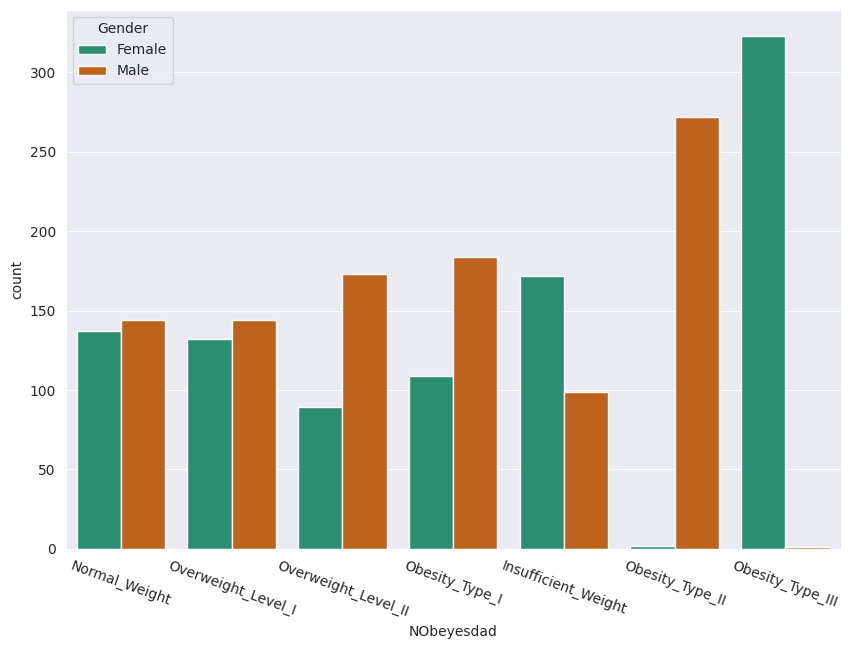

In [24]:
plt.figure(figsize=(10,7))
sns.countplot(data=data,x="NObeyesdad",hue="Gender",palette=sns.color_palette("Dark2"))
plt.xticks(rotation=-20)
plt.show()

1.Males are higher in almost all obesity types except obesity type 3.

2.Females are more likely to have insufficient weight.

3.Females are more likely to have severe obesity(type 3).




***AFFECT OF EATING FOOD ON OBESITY TYPE***

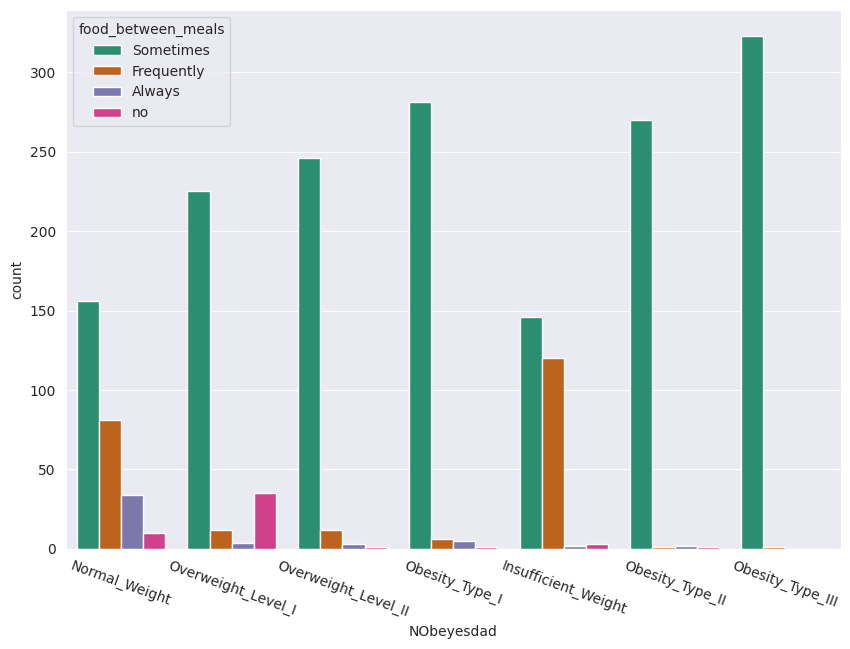

In [25]:
plt.figure(figsize=(10,7))
sns.countplot(data=data,x="NObeyesdad",hue="food_between_meals",palette=sns.color_palette("Dark2"))
plt.xticks(rotation=-20)
plt.show()

1.Most people eat food in between meals sometimes.

2.People with insufficient weight and normal weight eat food betwen meals frequently the most.

3.it can be said that eating small meals in between meals decrease weight

***AFFECT OF FAMILY HISTORY WITH OBESITY TYPE***

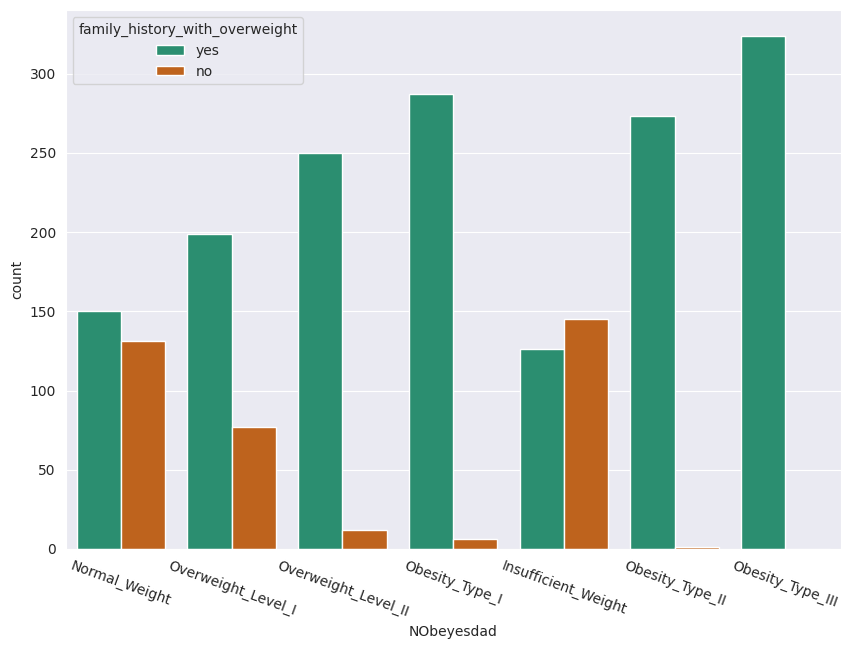

In [26]:
plt.figure(figsize=(10,7))
sns.countplot(data=data,x="NObeyesdad",hue="family_history_with_overweight",palette=sns.color_palette("Dark2"))
plt.xticks(rotation=-20)
plt.show()

Having family history with overweight seem to have an effect of increasing weight as obesity type 3,2,1 seem to all have family history with overweight

***RELATION BETWEEN DRINK AND SMOKE***

<Axes: xlabel='alcohol_drinking_frequency', ylabel='count'>

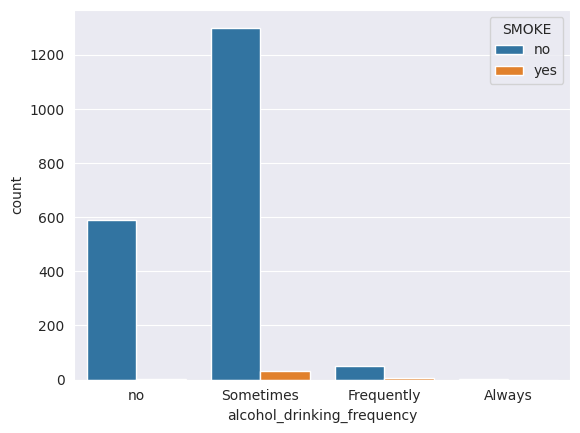

In [27]:
sns.countplot(data=data,x=data.alcohol_drinking_frequency,hue=data.SMOKE)

No most of the people who drink alcohol don't smoke

## **Data preprocessing and splitting **

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MaxAbsScaler,RobustScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score

In [29]:
data.select_dtypes(include="object").columns

Index(['Gender', 'family_history_with_overweight', 'high_calorie_food_eat',
       'food_between_meals', 'SMOKE', 'calories_monitoring',
       'alcohol_drinking_frequency', 'method_of_transportion', 'NObeyesdad'],
      dtype='object')

** Enoding ordinal features using label enode**

In [30]:
encoder  =LabelEncoder()
model_data = data.copy()
for col in ['alcohol_drinking_frequency','food_between_meals','NObeyesdad']:
    model_data[col] =encoder.fit_transform(model_data[col])

**Encoding nominal data using pd dummies**

In [31]:
cols = model_data.select_dtypes(include="object").columns
dums = pd.get_dummies(model_data[cols],dtype=int)
model_data = pd.concat([model_data,dums],axis=1).drop(columns=cols)

In [32]:
model_data.head()

,Age,Height,Weight,vegetable_eat_daily,number_of_meals_daily,food_between_meals,water_drinking_daily,physical_activity_daily,electronics_usage_daily,alcohol_drinking_frequency,...,high_calorie_food_eat_yes,SMOKE_no,SMOKE_yes,calories_monitoring_no,calories_monitoring_yes,method_of_transportion_Automobile,method_of_transportion_Bike,method_of_transportion_Motorbike,method_of_transportion_Public_Transportation,method_of_transportion_Walking
0,21,1.62,64,2,3,2,2,0,1,3,...,0,1,0,1,0,0,0,0,1,0
1,21,1.52,56,3,3,2,3,3,0,2,...,0,0,1,0,1,0,0,0,1,0
2,23,1.80,77,2,3,2,2,2,1,1,...,0,1,0,1,0,0,0,0,1,0
3,27,1.80,87,3,3,2,2,2,0,1,...,0,1,0,1,0,0,0,0,0,1
4,22,1.78,90,2,1,2,2,0,0,2,...,0,1,0,1,0,0,0,0,1,0


# Correlation between data atributes

In [33]:
corr_data =data.copy()
encoder  =LabelEncoder()
for col in corr_data.select_dtypes(include="object").columns:
    corr_data[col] =encoder.fit_transform(corr_data[col])

<Axes: >

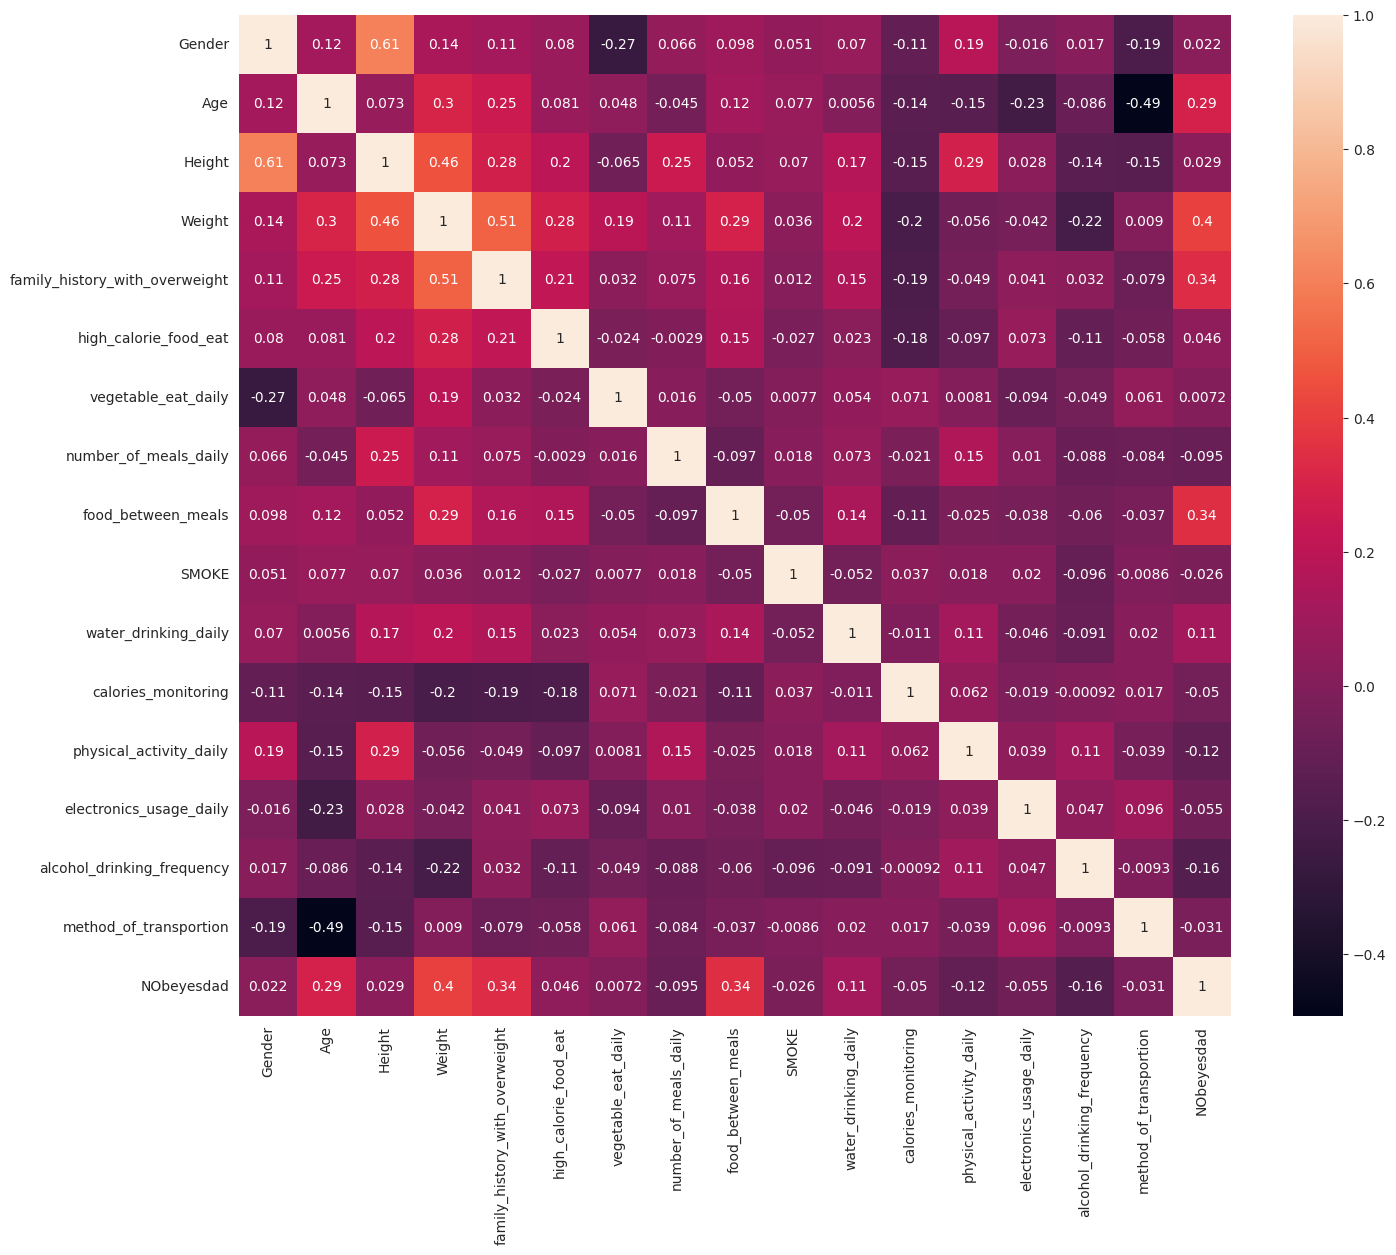

In [34]:
plt.figure(figsize=(16,13))
sns.heatmap(data=corr_data.corr(),annot=True)

# Normalizing data using max absolute scaler

In [35]:
x= model_data.drop(columns="NObeyesdad")
y=model_data["NObeyesdad"]
scaler_mas = MaxAbsScaler()
for col in x.columns:
    scaler_mas.fit(x[[col]])
    x[col] = scaler_mas.transform (x[[col]])

In [36]:
x.head()

,Age,Height,Weight,vegetable_eat_daily,number_of_meals_daily,food_between_meals,water_drinking_daily,physical_activity_daily,electronics_usage_daily,alcohol_drinking_frequency,...,high_calorie_food_eat_yes,SMOKE_no,SMOKE_yes,calories_monitoring_no,calories_monitoring_yes,method_of_transportion_Automobile,method_of_transportion_Bike,method_of_transportion_Motorbike,method_of_transportion_Public_Transportation,method_of_transportion_Walking
0,0.567568,0.818182,0.369942,0.666667,0.75,0.666667,0.666667,0.000000,0.5,1.000000,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.567568,0.767677,0.323699,1.000000,0.75,0.666667,1.000000,1.000000,0.0,0.666667,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.621622,0.909091,0.445087,0.666667,0.75,0.666667,0.666667,0.666667,0.5,0.333333,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.729730,0.909091,0.502890,1.000000,0.75,0.666667,0.666667,0.666667,0.0,0.333333,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.594595,0.898990,0.520231,0.666667,0.25,0.666667,0.666667,0.000000,0.0,0.666667,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Splitting data

In [37]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2,random_state=7)

In [38]:
x_train.head()

,Age,Height,Weight,vegetable_eat_daily,number_of_meals_daily,food_between_meals,water_drinking_daily,physical_activity_daily,electronics_usage_daily,alcohol_drinking_frequency,...,high_calorie_food_eat_yes,SMOKE_no,SMOKE_yes,calories_monitoring_no,calories_monitoring_yes,method_of_transportion_Automobile,method_of_transportion_Bike,method_of_transportion_Motorbike,method_of_transportion_Public_Transportation,method_of_transportion_Walking
1170,0.621622,0.838547,0.543353,0.666667,0.75,0.666667,0.666667,0.000000,0.0,1.000000,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
426,0.486486,0.818182,0.289017,1.000000,0.75,0.666667,0.333333,0.000000,0.0,0.666667,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
669,0.513514,0.812876,0.248555,1.000000,0.75,0.666667,1.000000,0.666667,0.5,1.000000,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1476,0.675676,0.924543,0.682081,0.333333,0.75,0.666667,0.666667,0.333333,0.0,0.666667,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
596,0.432432,0.854144,0.289017,0.666667,0.50,0.666667,1.000000,0.333333,0.0,0.666667,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# **TRAIN THE MODELS : LOGISTIC REGRESSION**

Logistic regression is a supervised machine learning algorithm used for classification tasks where the goal is to predict the probability that an instance belongs to a given class or not. Logistic regression is a statistical algorithm which analyze the relationship between two data factors. The article explores the fundamentals of logistic regression, it’s types and implementations.

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
cllg = LogisticRegression(max_iter=1000)
cllg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [41]:
predictions = cllg.predict(x_test)

 MODEL EVALUATION

In [42]:

print("Accuracy score:", accuracy_score(y_test, predictions))
print("Confusion matrix:\n", confusion_matrix(y_test, predictions))
print("Classification report:\n", classification_report(y_test, predictions))

Accuracy score: 0.6977329974811083
Confusion matrix:
 [[42  2  0  0  1  1  0]
 [21 25  1  0  0 10  8]
 [ 0  2 37 15  4  1  8]
 [ 0  0  3 49  0  0  1]
 [ 0  0  0  0 63  0  0]
 [ 0  8  5  0  1 42  7]
 [ 0  4  6  4  0  7 19]]
Classification report:
               precision    recall  f1-score   support

           0       0.67      0.91      0.77        46
           1       0.61      0.38      0.47        65
           2       0.71      0.55      0.62        67
           3       0.72      0.92      0.81        53
           4       0.91      1.00      0.95        63
           5       0.69      0.67      0.68        63
           6       0.44      0.47      0.46        40

    accuracy                           0.70       397
   macro avg       0.68      0.70      0.68       397
weighted avg       0.69      0.70      0.68       397



# Model : 2 - K - NEAREST NEIGHBOR ALGORITHM

The k-nearest neighbors (KNN) algorithm is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

In [43]:

from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [45]:
print("Accuracy score:", accuracy_score(y_test, pred))
print("Confusion matrix:\n", confusion_matrix(y_test, pred))
print("Classification report:\n", classification_report(y_test, pred))

Accuracy score: 0.7632241813602015
Confusion matrix:
 [[37  6  0  1  0  2  0]
 [10 34  1  2  0 12  6]
 [ 1  3 50  7  1  2  3]
 [ 1  0  1 51  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 3  7  5  2  0 44  2]
 [ 2  5  2  4  0  3 24]]
Classification report:
               precision    recall  f1-score   support

           0       0.69      0.80      0.74        46
           1       0.62      0.52      0.57        65
           2       0.85      0.75      0.79        67
           3       0.76      0.96      0.85        53
           4       0.98      1.00      0.99        63
           5       0.70      0.70      0.70        63
           6       0.69      0.60      0.64        40

    accuracy                           0.76       397
   macro avg       0.75      0.76      0.75       397
weighted avg       0.76      0.76      0.76       397



# **MODEL 3 : Support vector machine **
Support Vector Machine (SVM) is a powerful machine learning algorithm used for linear or nonlinear classification, regression, and even outlier detection tasks. SVMs can be used for a variety of tasks, such as text classification, image classification, spam detection, handwriting identification, gene expression analysis, face detection, and anomaly detection. SVMs are adaptable and efficient in a variety of applications because they can manage high-dimensional data and nonlinear relationships.

In [46]:
from sklearn import svm

In [47]:
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [48]:
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy score: 0.743073047858942
Confusion matrix:
 [[44  2  0  0  0  0  0]
 [19 30  1  0  0  8  7]
 [ 0  2 40 14  1  1  9]
 [ 0  0  2 50  0  0  1]
 [ 0  0  0  0 63  0  0]
 [ 0  7  4  0  0 44  8]
 [ 0  4  4  1  0  7 24]]
Classification report:
               precision    recall  f1-score   support

           0       0.70      0.96      0.81        46
           1       0.67      0.46      0.55        65
           2       0.78      0.60      0.68        67
           3       0.77      0.94      0.85        53
           4       0.98      1.00      0.99        63
           5       0.73      0.70      0.72        63
           6       0.49      0.60      0.54        40

    accuracy                           0.74       397
   macro avg       0.73      0.75      0.73       397
weighted avg       0.75      0.74      0.74       397



# MODEL 4 : Decision Tree
A decision tree is a type of supervised learning algorithm that is commonly used in machine learning to model and predict outcomes based on input data. It is a tree-like structure where each internal node tests on attribute, each branch corresponds to attribute value and each leaf node represents the final decision or prediction. The decision tree algorithm falls under the category of supervised learning. They can be used to solve both regression and classification problems.

In [49]:

from sklearn.tree import DecisionTreeClassifier

In [50]:
clf_entropy = DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=3,min_samples_leaf=5)
clf_entropy.fit(x_train,y_train)
y_pred = clf_entropy.predict(x_test)

visual representation of Decision Tree Algorithm

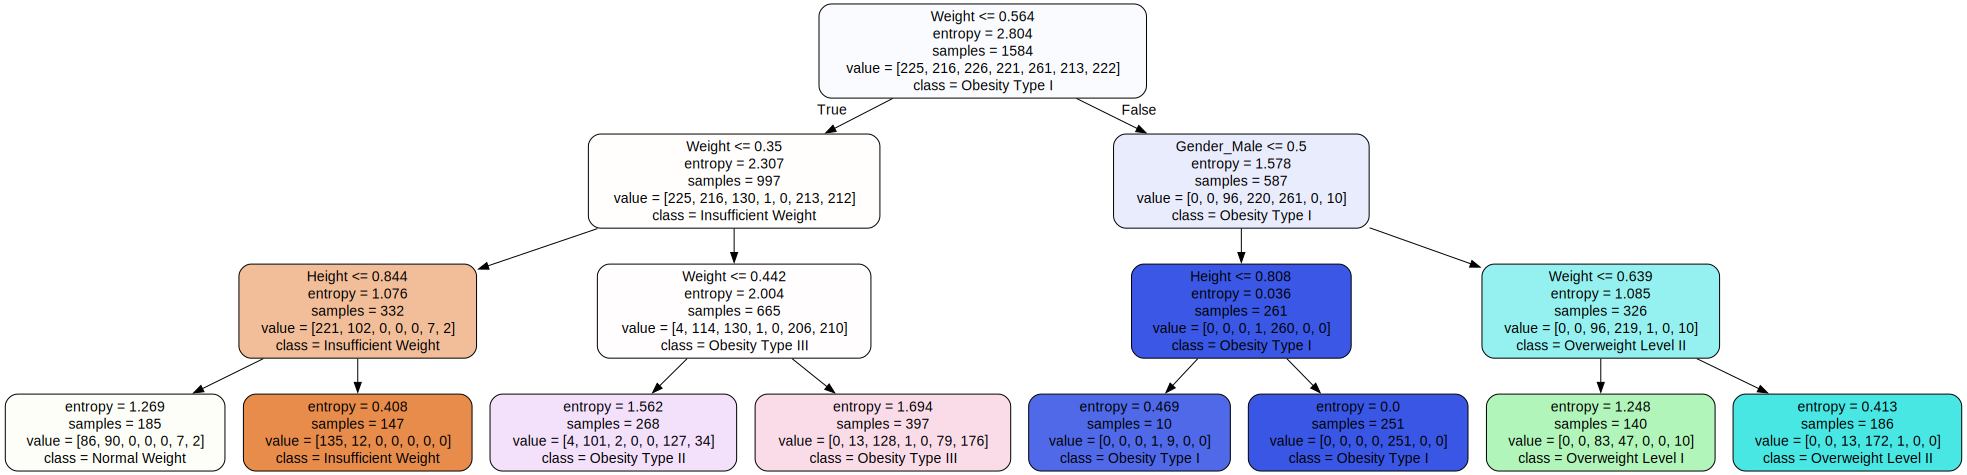

In [51]:
from sklearn.tree import export_graphviz
import graphviz

# Create a decision tree classifier
clf_entropy = DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=3,min_samples_leaf=5)
clf_entropy.fit(x_train,y_train)

# Export the decision tree to a file
export_graphviz(clf_entropy, out_file="tree.dot", feature_names=x_train.columns, class_names=["Insufficient Weight", "Normal Weight", "Overweight Level I", "Overweight Level II", "Obesity Type I", "Obesity Type II", "Obesity Type III"], filled=True, rounded=True)

# Load the graph from the file and display it
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [52]:
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))


Accuracy score: 0.6473551637279596
Confusion matrix:
 [[31 13  0  0  0  2  0]
 [ 7 31  0  0  0 22  5]
 [ 0  0 23  3  0  2 39]
 [ 0  0 11 42  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  3  0  0  0 39 21]
 [ 0  0  3  0  0  9 28]]
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.67      0.74        46
           1       0.66      0.48      0.55        65
           2       0.62      0.34      0.44        67
           3       0.93      0.79      0.86        53
           4       1.00      1.00      1.00        63
           5       0.53      0.62      0.57        63
           6       0.30      0.70      0.42        40

    accuracy                           0.65       397
   macro avg       0.69      0.66      0.65       397
weighted avg       0.70      0.65      0.66       397



# CONCLUSION

The order of best performing algorithm for this dataset are


1.   KNN : Accuracy = 76.32%
2.   SVM : Accuracy = 74.30%
3.   LR  : Accuracy = 69.77%
4.   DT  : Accuracy = 64.73%

here KNN performed the best and decision tree the worst.

